In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data preproccessing and EDA

In [2]:
df_education = pd.read_csv(r"C:\Users\mobin\DATASIENCE\INTERNSHIP\Job Recommendation Engine\Details and Datasets\education.csv")
df_employment = pd.read_csv(r"C:\Users\mobin\DATASIENCE\INTERNSHIP\Job Recommendation Engine\Details and Datasets\employment.csv")
df_job = pd.read_csv(r"C:\Users\mobin\DATASIENCE\INTERNSHIP\Job Recommendation Engine\Details and Datasets\jobs.csv")

#### Data EDA for df_education

In [3]:
df_education.head()

Id      primarySchool  primaryPercentage  primaryPassoutYear  \
0  966                NaN                  0                   0   
1  967  Marks High school                 86                1999   
2  968                NaN                  0                   0   
3  969                NaN                  0                   0   
4  976                NaN                  0                   0   

     secondarySchool  secondaryPercentage  secondaryPassoutYear graduation  \
0                NaN                  0.0                     0        NaN   
1  Marks High school                 80.0                  2001        NaN   
2                NaN                  0.0                     0        NaN   
3                NaN                  0.0                     0        NaN   
4                NaN                  0.0                     0        NaN   

   graduationPercentage  graduationPassoutYear  orgId applicantId  \
0                   0.0                      0    NaN    AIJP1291   
1                   0.0                      0    NaN    AIJV7014   
2                   0.0                      0    NaN    AIAA7617   
3                   0.0                      0    NaN    AIRK6266   
4                   0.0                      0    NaN    AIDK9811   

  certificates  name  degree  fieldOfStudy  percentage  certificate  \
0          NaN   NaN     NaN           NaN         NaN          NaN   
1          NaN   NaN     NaN           NaN         NaN          NaN   
2          NaN   NaN     NaN           NaN         NaN          NaN   
3          NaN   NaN     NaN           NaN         NaN          NaN   
4          NaN   NaN     NaN           NaN         NaN          NaN   

                    createdOn  
0  2024-03-08 08:48:16.349684  
1  2024-03-08 08:48:16.349684  
2  2024-03-08 08:48:16.349684  
3  2024-03-08 08:48:16.349684  
4  2024-03-08 08:48:16.349684

In [4]:
df_education.columns

Index(['Id', 'primarySchool', 'primaryPercentage', 'primaryPassoutYear',
       'secondarySchool', 'secondaryPercentage', 'secondaryPassoutYear',
       'graduation', 'graduationPercentage', 'graduationPassoutYear', 'orgId',
       'applicantId', 'certificates', 'name', 'degree', 'fieldOfStudy',
       'percentage', 'certificate', 'createdOn'],
      dtype='object')

In [5]:
df_education.shape

(188, 19)

In [6]:
df_education.duplicated().sum()

0

In [7]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     188 non-null    int64  
 1   primarySchool          11 non-null     object 
 2   primaryPercentage      188 non-null    int64  
 3   primaryPassoutYear     188 non-null    int64  
 4   secondarySchool        8 non-null      object 
 5   secondaryPercentage    188 non-null    float64
 6   secondaryPassoutYear   188 non-null    int64  
 7   graduation             9 non-null      object 
 8   graduationPercentage   188 non-null    float64
 9   graduationPassoutYear  188 non-null    int64  
 10  orgId                  0 non-null      float64
 11  applicantId            188 non-null    object 
 12  certificates           15 non-null     object 
 13  name                   0 non-null      float64
 14  degree                 0 non-null      float64
 15  fieldO

In [8]:
"""
## IGNORING FOR NOW

# removing unneccessery columns:

df1_education = df_education.copy()
remove_coluns = []

# std = 0 are constant, they do not help in prediction process
# std threshold values is 0.02

for i in df1_education.columns:
   if df1_education[i].dtype != 'O':  
        if df1_education[i].std() <= 0.02 or 'nan':
            remove_coluns.append(i)

#drop the columns
df1_education.drop(columns=remove_coluns, axis= 1 , inplace= True)
# columns that are dropped

print(remove_coluns)
"""

"\n## IGNORING FOR NOW\n\n# removing unneccessery columns:\n\ndf1_education = df_education.copy()\nremove_coluns = []\n\n# std = 0 are constant, they do not help in prediction process\n# std threshold values is 0.02\n\nfor i in df1_education.columns:\n   if df1_education[i].dtype != 'O':  \n        if df1_education[i].std() <= 0.02 or 'nan':\n            remove_coluns.append(i)\n\n#drop the columns\ndf1_education.drop(columns=remove_coluns, axis= 1 , inplace= True)\n# columns that are dropped\n\nprint(remove_coluns)\n"

In [9]:
df_education.describe().T

count         mean         std    min      25%     50%  \
Id                     188.0  1101.771277   66.721032  966.0  1057.75  1110.5   
primaryPercentage      188.0     2.085106   11.914275    0.0     0.00     0.0   
primaryPassoutYear     188.0    77.218085  373.435188    0.0     0.00     0.0   
secondaryPercentage    188.0     2.026596   11.550028    0.0     0.00     0.0   
secondaryPassoutYear   188.0    66.574468  346.151925    0.0     0.00     0.0   
graduationPercentage   188.0     1.979255   11.504272    0.0     0.00     0.0   
graduationPassoutYear  188.0    88.207447  400.824477    0.0     0.00     0.0   
orgId                    0.0          NaN         NaN    NaN      NaN     NaN   
name                     0.0          NaN         NaN    NaN      NaN     NaN   
degree                   0.0          NaN         NaN    NaN      NaN     NaN   
fieldOfStudy             0.0          NaN         NaN    NaN      NaN     NaN   
percentage               0.0          NaN         NaN    NaN      NaN     NaN   
certificate              0.0          NaN         NaN    NaN      NaN     NaN   

                           75%     max  
Id                     1157.25  1204.0  
primaryPercentage         0.00    89.0  
primaryPassoutYear        0.00  2017.0  
secondaryPercentage       0.00    90.0  
secondaryPassoutYear      0.00  2019.0  
graduationPercentage      0.00    89.0  
graduationPassoutYear     0.00  2023.0  
orgId                      NaN     NaN  
name                       NaN     NaN  
degree                     NaN     NaN  
fieldOfStudy               NaN     NaN  
percentage                 NaN     NaN  
certificate                NaN     NaN

## EXPLORING DATA

In [10]:
numeric_features = [feature for feature in df_education.columns if df_education[feature].dtype != 'O']
categorical_features = [feature for feature in df_education.columns if df_education[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical feature: {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features: ['Id', 'primaryPercentage', 'primaryPassoutYear', 'secondaryPercentage', 'secondaryPassoutYear', 'graduationPercentage', 'graduationPassoutYear', 'orgId', 'name', 'degree', 'fieldOfStudy', 'percentage', 'certificate']

We have 6 categorical feature: ['primarySchool', 'secondarySchool', 'graduation', 'applicantId', 'certificates', 'createdOn']


### Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Numerical Features

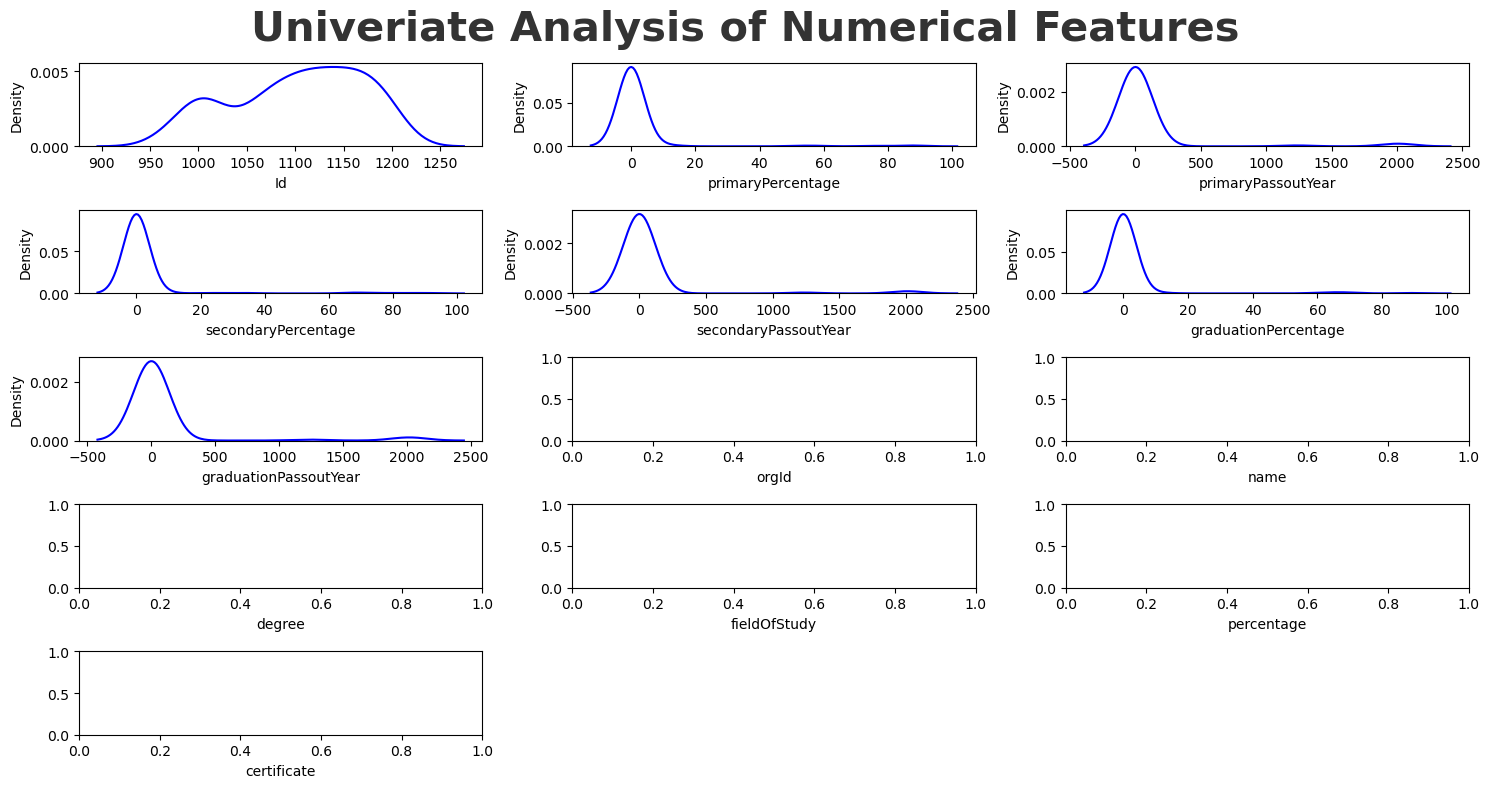

In [38]:
plt.figure(figsize=(15,8))
plt.suptitle('Univeriate Analysis of Numerical Features', fontsize = 30, fontweight = 'bold', alpha = 0.8)


for i in range(0, len(numeric_features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x = df_education[numeric_features[i]], color = 'blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.savefig("Univariate Analysis of Numerical Features")

**Report**

* Primarypassoutyear, seconderypercentage, seconderypassoutyear, graduatrionpercentage, and graduationpassoutyear are positively skewed or right skewed.
* orgid, name, degree, fieldofstudy, percentage,certificate are not contributing.

## Categorical Features

In [12]:
plt.figure(figsize=(20,15), dpi = 720)
plt.suptitle('Univariate Analysis of Categorical Features', fontsize =20, fontweight = 'bold', alpha = 0.8)

for i in range(0, len(categorical_features)):
    plt.subplot(3,3, i+1)
    sns.countplot(x = df_education[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

### Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [13]:
df_education[numeric_features].corr()

Id  primaryPercentage  primaryPassoutYear  \
Id                     1.000000          -0.270418           -0.306233   
primaryPercentage     -0.270418           1.000000            0.886219   
primaryPassoutYear    -0.306233           0.886219            1.000000   
secondaryPercentage   -0.268920           0.949360            0.856421   
secondaryPassoutYear  -0.287832           0.827411            0.920495   
graduationPercentage  -0.158238           0.612884            0.538014   
graduationPassoutYear -0.236043           0.630238            0.785386   
orgId                       NaN                NaN                 NaN   
name                        NaN                NaN                 NaN   
degree                      NaN                NaN                 NaN   
fieldOfStudy                NaN                NaN                 NaN   
percentage                  NaN                NaN                 NaN   
certificate                 NaN                NaN                 NaN   

                       secondaryPercentage  secondaryPassoutYear  \
Id                               -0.268920             -0.287832   
primaryPercentage                 0.949360              0.827411   
primaryPassoutYear                0.856421              0.920495   
secondaryPercentage               1.000000              0.907265   
secondaryPassoutYear              0.907265              1.000000   
graduationPercentage              0.650766              0.586335   
graduationPassoutYear             0.610226              0.700176   
orgId                                  NaN                   NaN   
name                                   NaN                   NaN   
degree                                 NaN                   NaN   
fieldOfStudy                           NaN                   NaN   
percentage                             NaN                   NaN   
certificate                            NaN                   NaN   

                       graduationPercentage  graduationPassoutYear  orgId  \
Id                                -0.158238              -0.236043    NaN   
primaryPercentage                  0.612884               0.630238    NaN   
primaryPassoutYear                 0.538014               0.785386    NaN   
secondaryPercentage                0.650766               0.610226    NaN   
secondaryPassoutYear               0.586335               0.700176    NaN   
graduationPercentage               1.000000               0.821813    NaN   
graduationPassoutYear              0.821813               1.000000    NaN   
orgId                                   NaN                    NaN    NaN   
name                                    NaN                    NaN    NaN   
degree                                  NaN                    NaN    NaN   
fieldOfStudy                            NaN                    NaN    NaN   
percentage                              NaN                    NaN    NaN   
certificate                             NaN                    NaN    NaN   

                       name  degree  fieldOfStudy  percentage  certificate  
Id                      NaN     NaN           NaN         NaN          NaN  
primaryPercentage       NaN     NaN           NaN         NaN          NaN  
primaryPassoutYear      NaN     NaN           NaN         NaN          NaN  
secondaryPercentage     NaN     NaN           NaN         NaN          NaN  
secondaryPassoutYear    NaN     NaN           NaN         NaN          NaN  
graduationPercentage    NaN     NaN           NaN         NaN          NaN  
graduationPassoutYear   NaN     NaN           NaN         NaN          NaN  
orgId                   NaN     NaN           NaN         NaN          NaN  
name                    NaN     NaN           NaN         NaN          NaN  
degree                  NaN     NaN           NaN         NaN          NaN  
fieldOfStudy            NaN     NaN           NaN         NaN          NaN  
percentage              NaN     NaN 

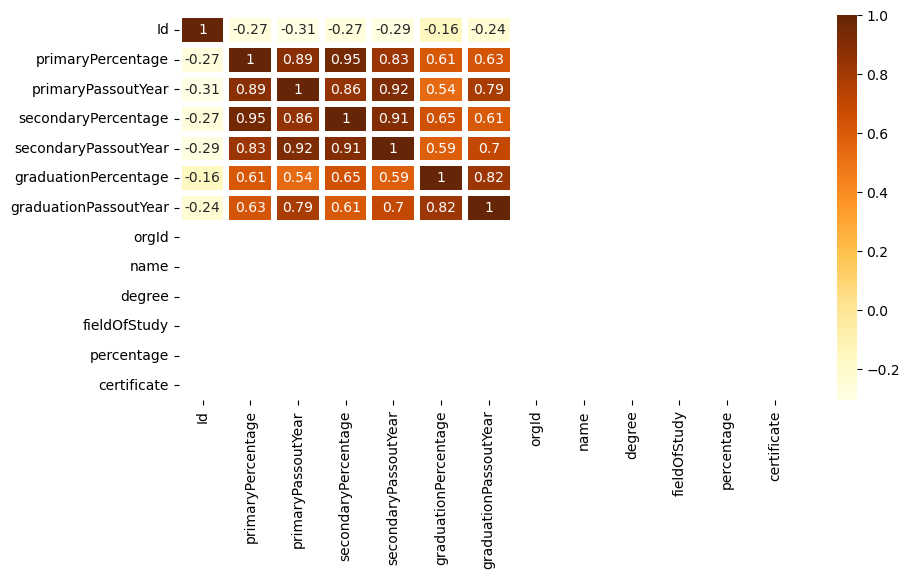

In [39]:
plt.figure(figsize=(10,5))

sns.heatmap(df_education[numeric_features].corr(), annot= True, linewidths= 3, cmap = 'YlOrBr')
plt.savefig("Correlation of numerical values for education")

### Inferences (Correlated Features)

#### threshold value is 0.80

* PrimaryPassouyear and primarypercentage are highly correlated
* primarypercentage and SecondaryPercentage are higly corelated
* primarypercentage and secondarypassoutyear are higly corelated
*  SecondaryPercentage and secondarypassoutyear are higly corelated
*  PrimaryPassouyear and secondarypassoutyear are higly corelated
*  secondarypassoutyear and SecondaryPercentage are higly corelated


In [15]:
numeric_features

['Id',
 'primaryPercentage',
 'primaryPassoutYear',
 'secondaryPercentage',
 'secondaryPassoutYear',
 'graduationPercentage',
 'graduationPassoutYear',
 'orgId',
 'name',
 'degree',
 'fieldOfStudy',
 'percentage',
 'certificate']

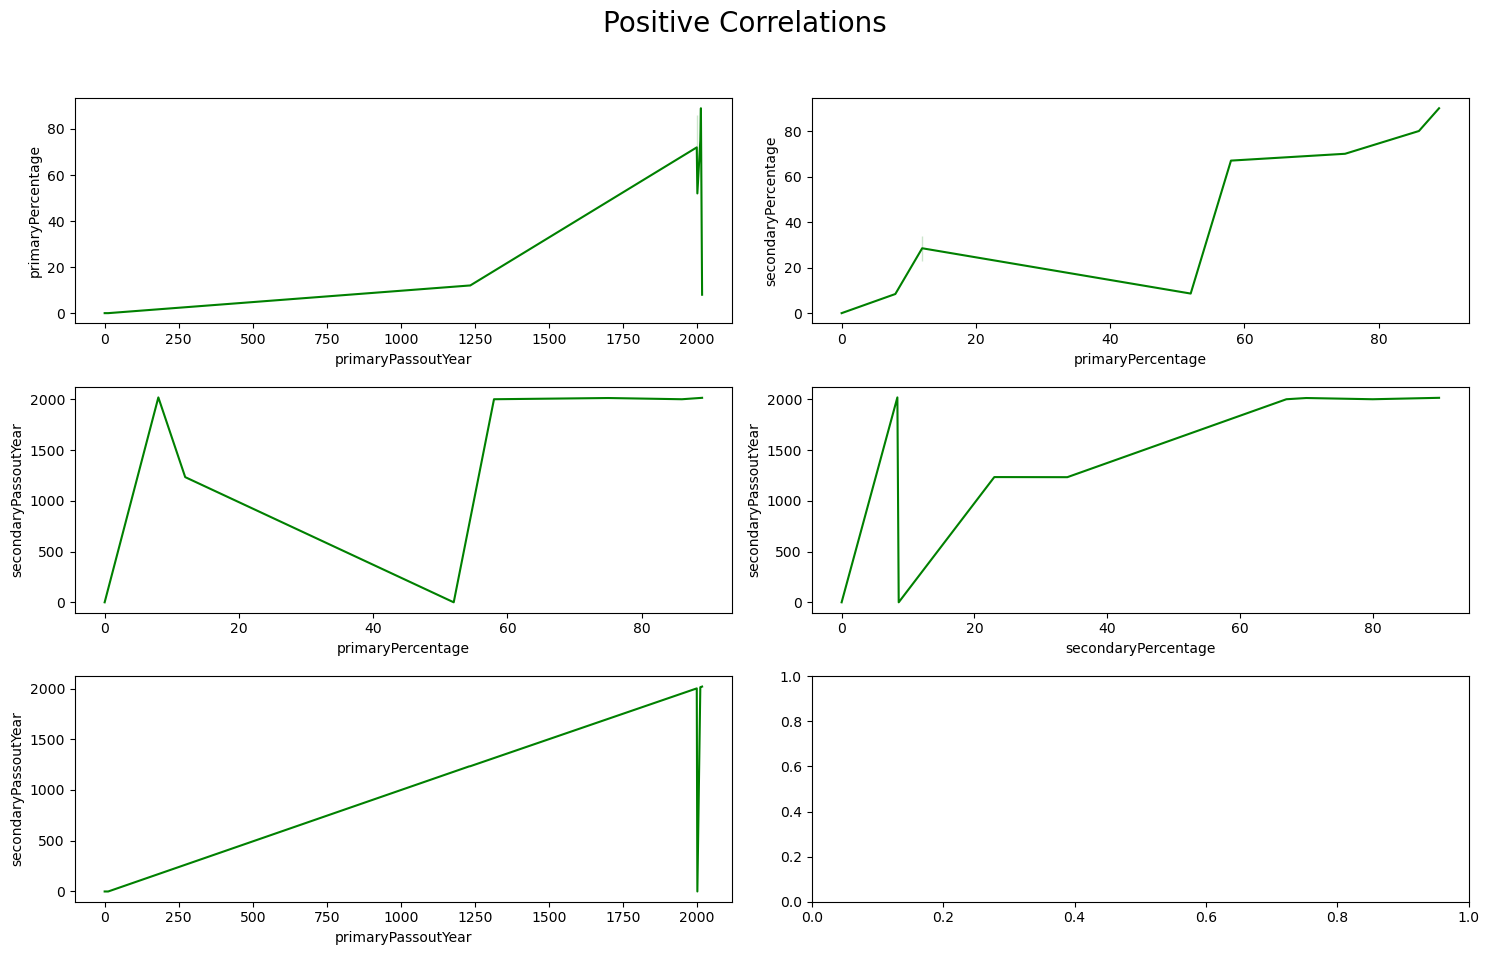

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(15,10))
fig.suptitle("Positive Correlations",fontsize='20')

sns.lineplot(x= "primaryPassoutYear",y="primaryPercentage",data=df_education,color='green',ax=axs[0][0])
sns.lineplot(x= "primaryPercentage",y="secondaryPercentage",data=df_education,color='green',ax=axs[0][1])
sns.lineplot(x= "primaryPercentage",y="secondaryPassoutYear",data=df_education,color='green',ax=axs[1][0])
sns.lineplot(x= "secondaryPercentage",y="secondaryPassoutYear",data=df_education,color='green',ax=axs[1][1])
sns.lineplot(x= "primaryPassoutYear",y="secondaryPassoutYear",data=df_education,color='green',ax=axs[2][0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data Preproccessing for df_employment

In [17]:
df_employment.head()

employmentId uploadResume                       currentCompany  \
0            48          NaN                   ESMOB Technologies   
1            61          NaN  Lejara Global IT Solutions Pvt. Ltd   
2            62          NaN      Dhatri Info Solutions Pvt. Ltd,   
3            63          NaN                       IT Contractors   
4            64          NaN                         Novell Logic   

   currentDesignation annualSalary  industry      functionalArea  role  \
0  React JS Developer          3.5       1.0  Software Developer   NaN   
1       RPA Developer          4.5       1.0  Software Developer   NaN   
2      Java Developer       360000       1.0  Software Developer   NaN   
3     Java Developer        490000       1.0                  IT   NaN   
4     Java Developer        500000       1.0                  IT   NaN   

  currentLocation  orgId  ... packageOffered lastWorkingDay  remarks  \
0       Hyderabad    1.0  ...            NaN            NaN      NaN   
1       Hyderabad    1.0  ...            NaN            NaN      NaN   
2       Hyderabad    1.0  ...            NaN            NaN      NaN   
3       Bangalore    1.0  ...            NaN            NaN      NaN   
4       Bangalore    1.0  ...            NaN            NaN      NaN   

   previousCompany  offerLetter experienceLetter relieveingLetter isRecent  \
0              NaN          NaN              NaN              NaN      NaN   
1              NaN          NaN              NaN              NaN      NaN   
2              NaN          NaN              NaN              NaN      NaN   
3              NaN          NaN              NaN              NaN      NaN   
4              NaN          NaN              NaN              NaN      NaN   

  paySlips                   createdOn  
0      NaN  2024-03-08 08:49:43.960932  
1      NaN  2024-03-08 08:49:43.960932  
2      NaN  2024-03-08 08:49:43.960932  
3      NaN  2024-03-08 08:49:43.960932  
4      NaN  2024-03-08 08:49:43.960932  

[5 rows x 33 columns]

In [18]:
pd.set_option('display.max_columns',None)

In [19]:
df_employment.head()

employmentId uploadResume                       currentCompany  \
0            48          NaN                   ESMOB Technologies   
1            61          NaN  Lejara Global IT Solutions Pvt. Ltd   
2            62          NaN      Dhatri Info Solutions Pvt. Ltd,   
3            63          NaN                       IT Contractors   
4            64          NaN                         Novell Logic   

   currentDesignation annualSalary  industry      functionalArea  role  \
0  React JS Developer          3.5       1.0  Software Developer   NaN   
1       RPA Developer          4.5       1.0  Software Developer   NaN   
2      Java Developer       360000       1.0  Software Developer   NaN   
3     Java Developer        490000       1.0                  IT   NaN   
4     Java Developer        500000       1.0                  IT   NaN   

  currentLocation  orgId noticePeriod                   skills  totalWorkExp  \
0       Hyderabad    1.0          NaN                 {css,js}          2.75   
1       Hyderabad    1.0          NaN             {RPA,python}          6.00   
2       Hyderabad    1.0          NaN  {java,spring,hibernate}          5.00   
3       Bangalore    1.0          NaN        {Java,Springboot}          3.00   
4       Bangalore    1.0          NaN        {Java,springboot}          3.00   

   minExp  maxExp applicantId preferedLocation holdingAnyOffer expectedCtc  \
0     NaN     NaN    AISB2256              NaN             NaN         NaN   
1     NaN     NaN    AIPH2278              NaN             NaN         NaN   
2     NaN     NaN    AIST2288              NaN             NaN         NaN   
3     NaN     NaN    AIVV2277              NaN             NaN         NaN   
4     NaN     NaN    AIMV2241              NaN             NaN         NaN   

  feedback comment isCurrent companyEmail  packageOffered lastWorkingDay  \
0      NaN     NaN       NaN          NaN             NaN            NaN   
1      NaN     NaN       NaN          NaN             NaN            NaN   
2      NaN     NaN       NaN          NaN             NaN            NaN   
3      NaN     NaN       NaN          NaN             NaN            NaN   
4      NaN     NaN       NaN          NaN             NaN            NaN   

  remarks  previousCompany  offerLetter  experienceLetter  relieveingLetter  \
0     NaN              NaN          NaN               NaN               NaN   
1     NaN              NaN          NaN               NaN               NaN   
2     NaN              NaN          NaN               NaN               NaN   
3     NaN              NaN          NaN               NaN               NaN   
4     NaN              NaN          NaN               NaN               NaN   

   isRecent  paySlips                   createdOn  
0       NaN       NaN  2024-03-08 08:49:43.960932  
1       NaN       NaN  2024-03-08 08:49:43.960932  
2       NaN       NaN  2024-03-08 08:49:43.960932  
3       NaN       NaN  2024-03-08 08:49:43.960932  
4       NaN       NaN  2024-03-08 08:49:43.960932

In [20]:
df_employment.isnull().sum()

employmentId             0
uploadResume           499
currentCompany          97
currentDesignation      43
annualSalary           105
industry                95
functionalArea         113
role                  2099
currentLocation        100
orgId                  146
noticePeriod           180
skills                   0
totalWorkExp            97
minExp                2099
maxExp                2099
applicantId              0
preferedLocation       563
holdingAnyOffer        585
expectedCtc            560
feedback              2078
comment               1940
isCurrent              906
companyEmail          1405
packageOffered        2084
lastWorkingDay        2078
remarks               2040
previousCompany       2099
offerLetter           2099
experienceLetter      2099
relieveingLetter      2099
isRecent              2099
paySlips              2099
createdOn                0
dtype: int64

In [21]:
numeric_employment = [feature for feature in df_employment.columns if df_employment[feature].dtype != "O"]
categorical_employment = [feature for feature in df_employment.columns if df_employment[feature].dtype == "O"]

print('We have {} numerical features: {}'.format(len(numeric_employment), numeric_employment))
print('\nWe have {} categorical feature: {}'.format(len(categorical_employment), categorical_employment))

We have 14 numerical features: ['employmentId', 'industry', 'role', 'orgId', 'totalWorkExp', 'minExp', 'maxExp', 'packageOffered', 'previousCompany', 'offerLetter', 'experienceLetter', 'relieveingLetter', 'isRecent', 'paySlips']

We have 19 categorical feature: ['uploadResume', 'currentCompany', 'currentDesignation', 'annualSalary', 'functionalArea', 'currentLocation', 'noticePeriod', 'skills', 'applicantId', 'preferedLocation', 'holdingAnyOffer', 'expectedCtc', 'feedback', 'comment', 'isCurrent', 'companyEmail', 'lastWorkingDay', 'remarks', 'createdOn']


### Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Numerical Features

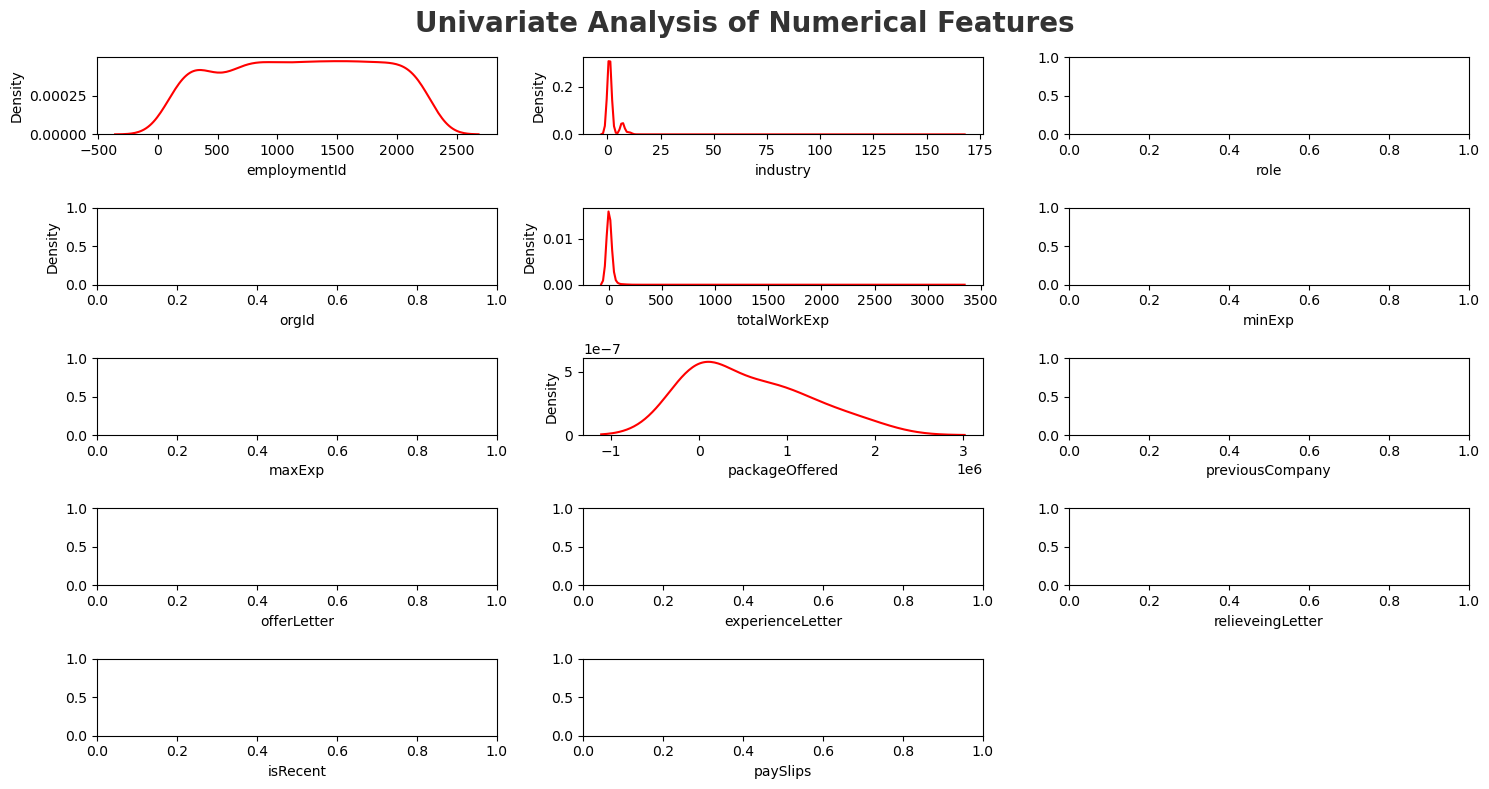

In [40]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8)

for i in range(0, len(numeric_employment)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df_employment[numeric_employment[i]], color = 'red')
    plt.xlabel(numeric_employment[i])
    plt.tight_layout()
    
plt.savefig("Univaiate analysis of employment data")

## Categorical Features

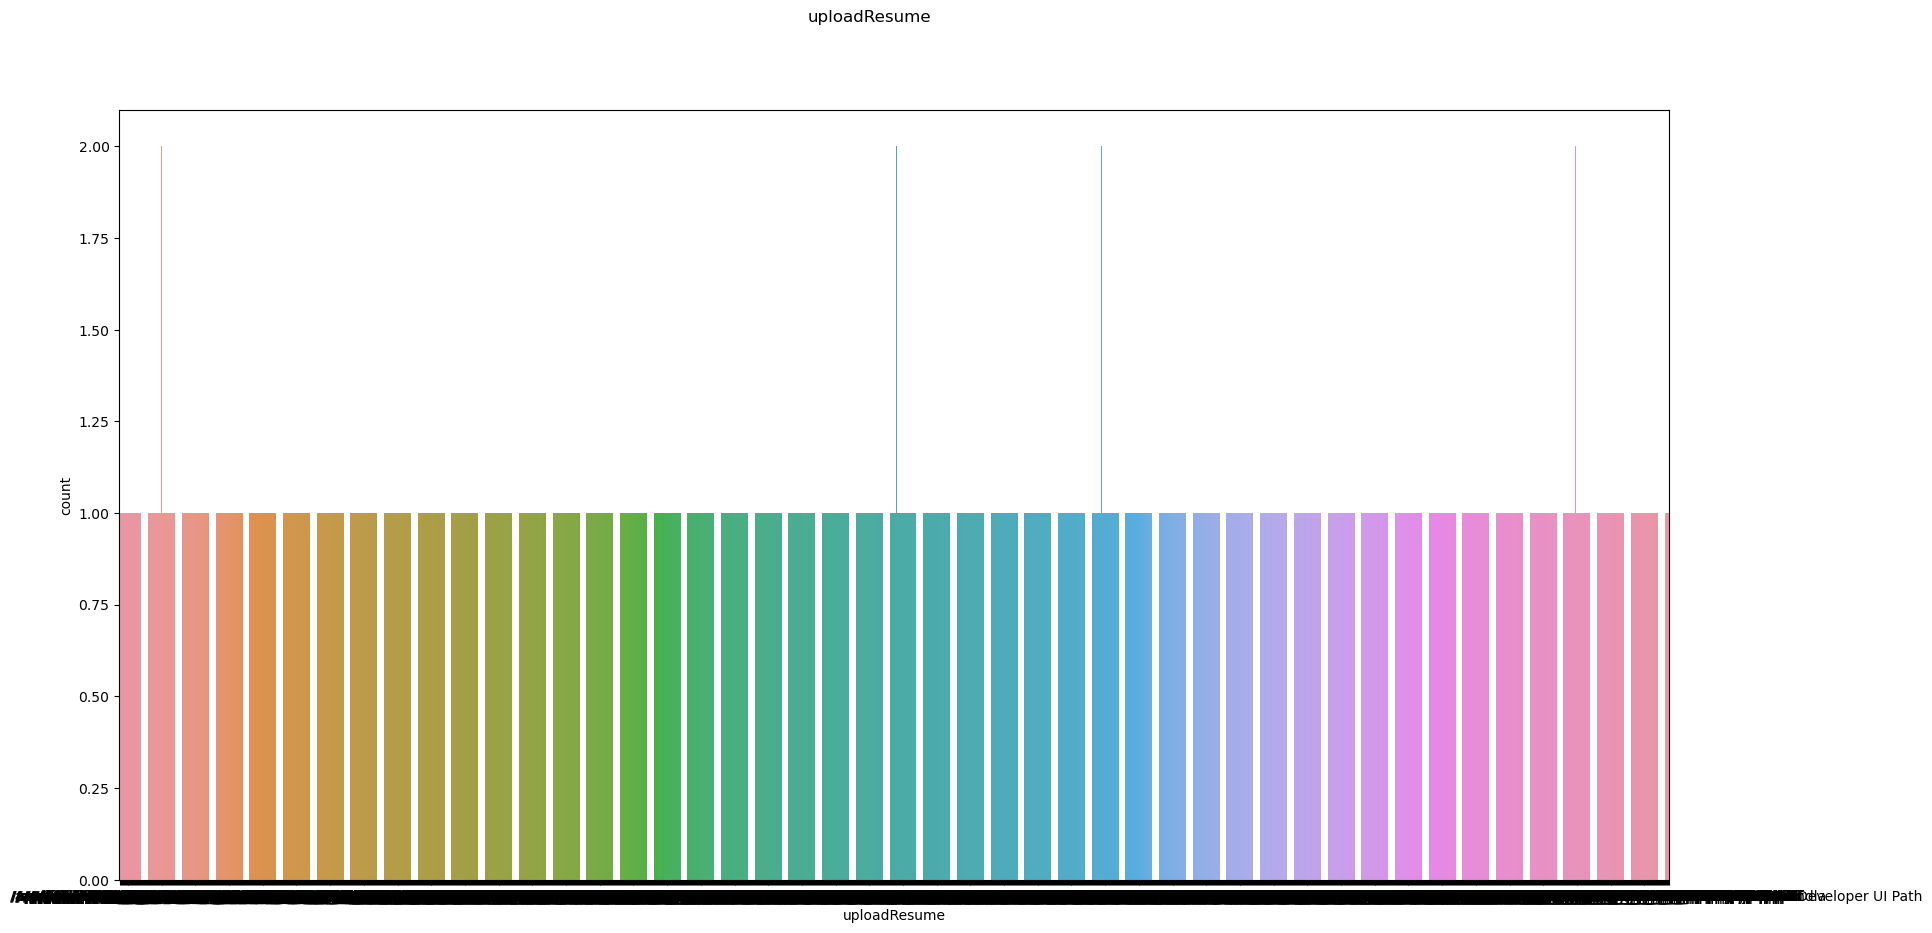

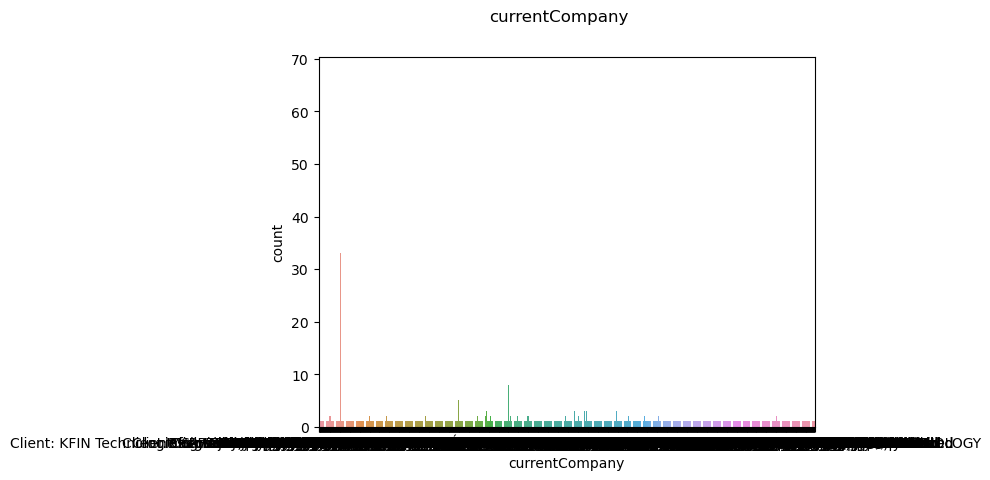

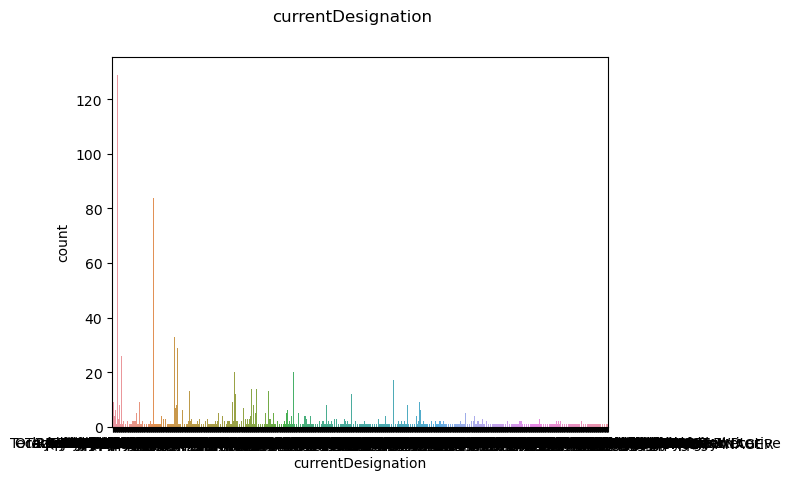

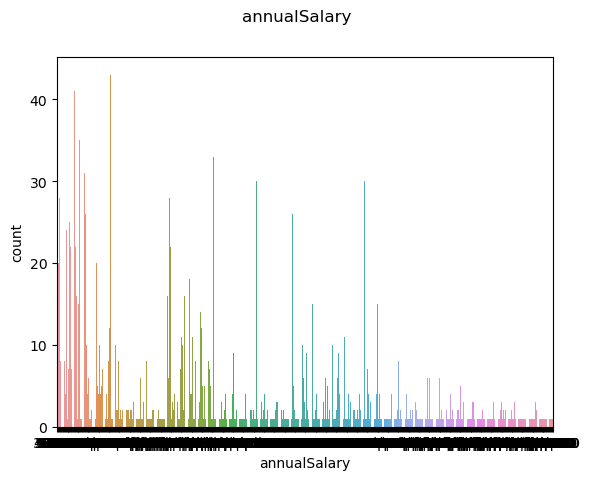

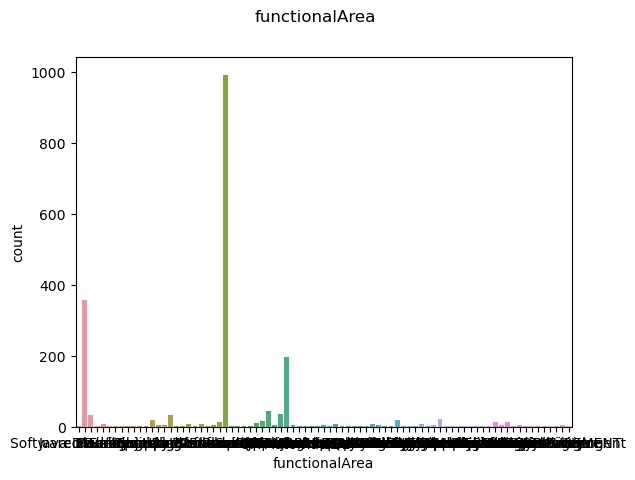

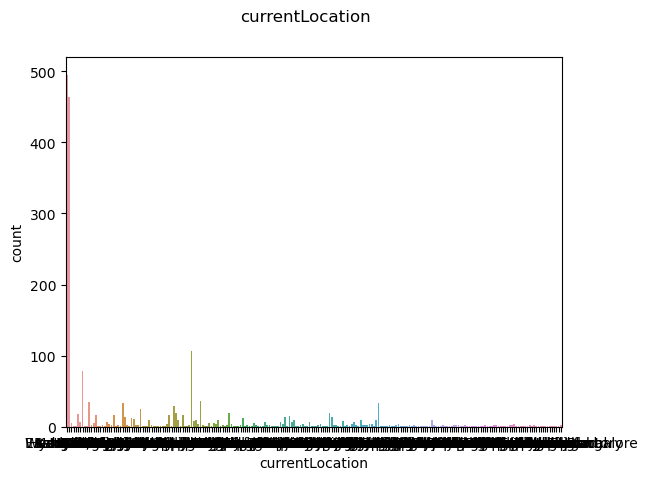

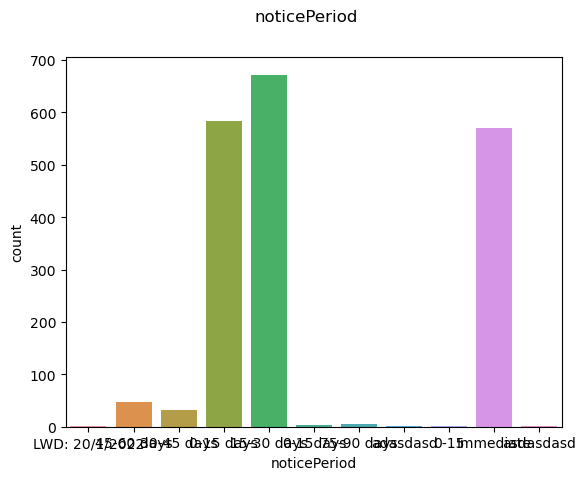

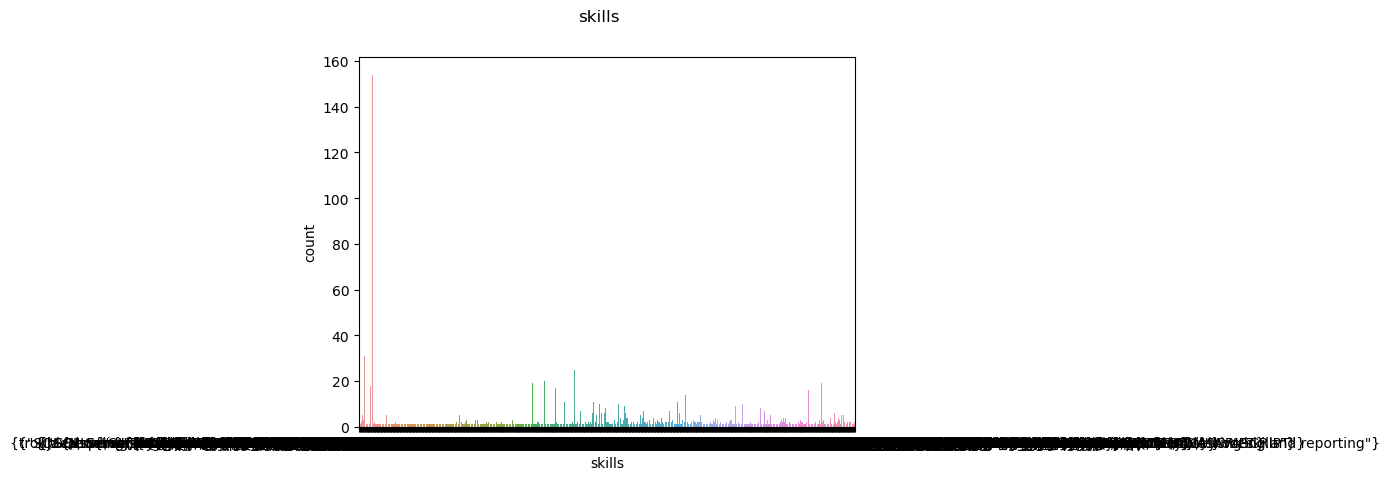

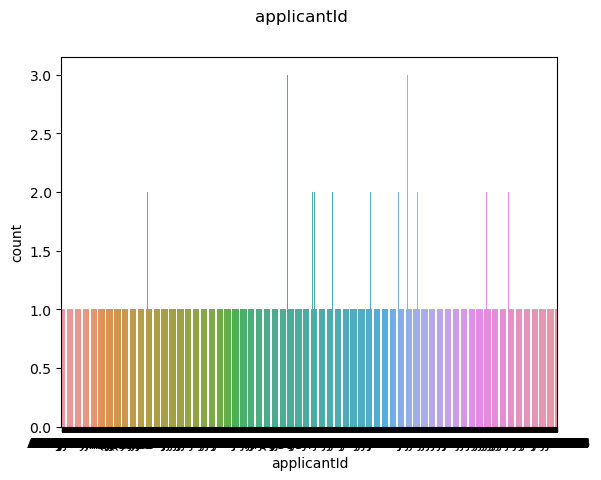

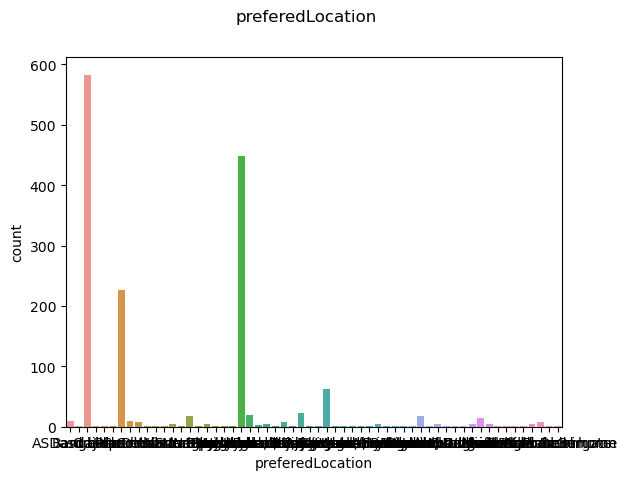

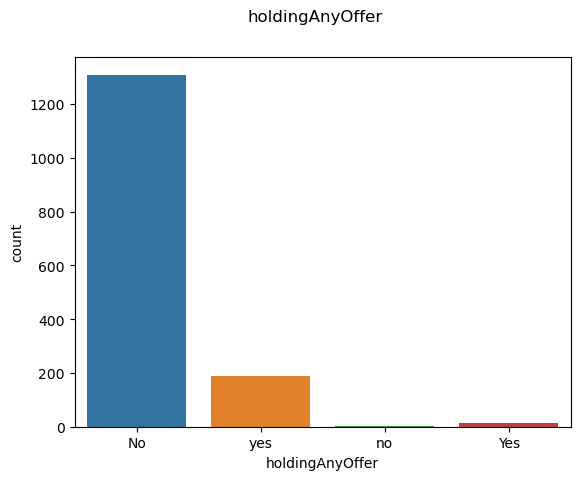

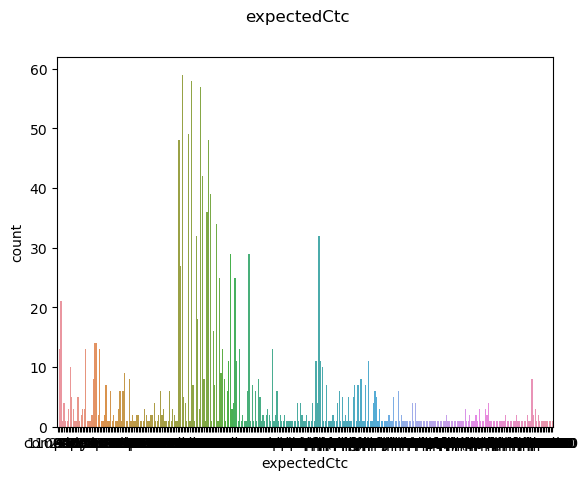

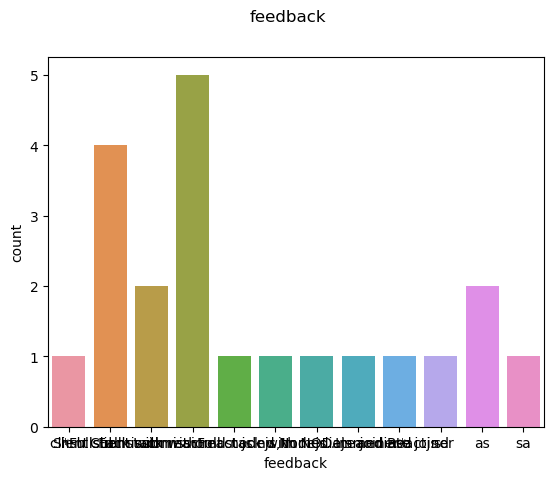

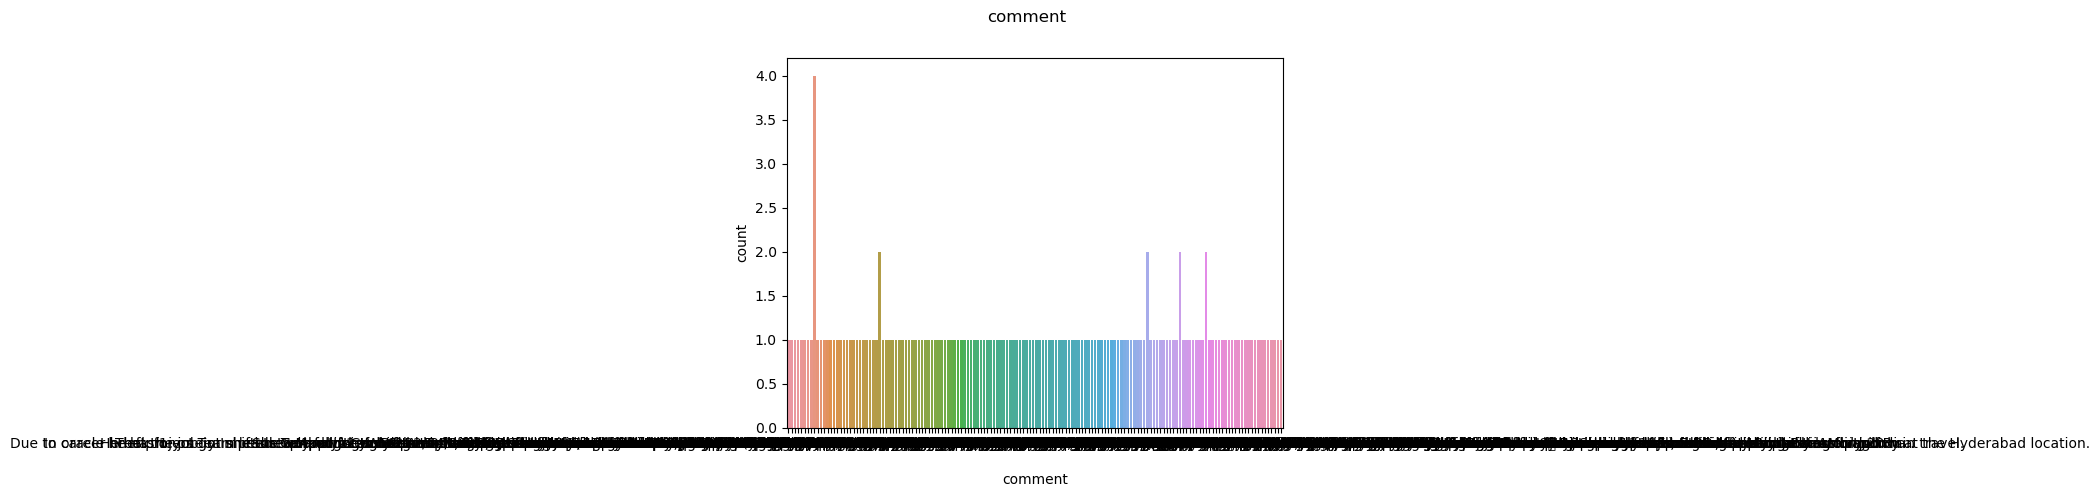

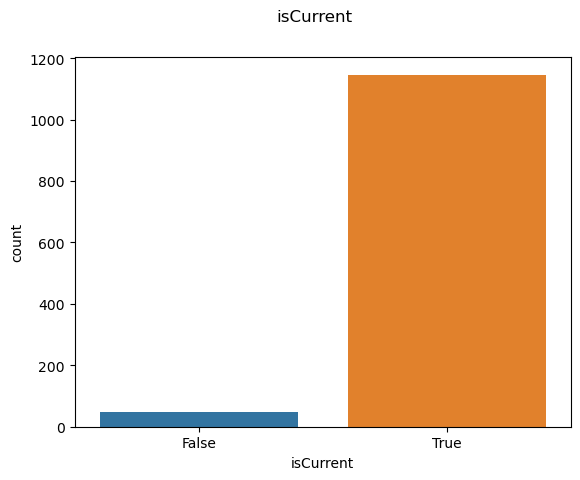

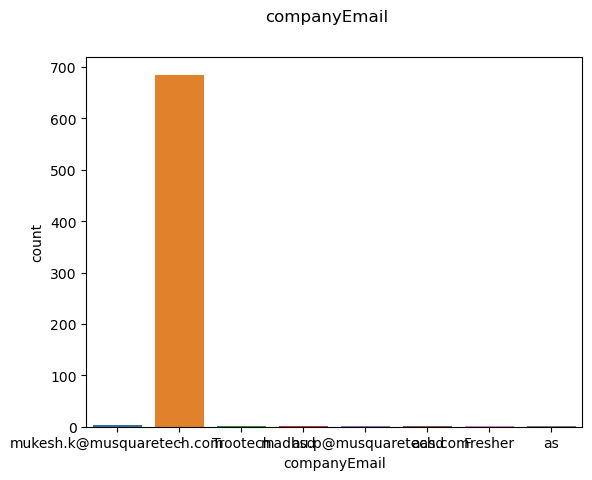

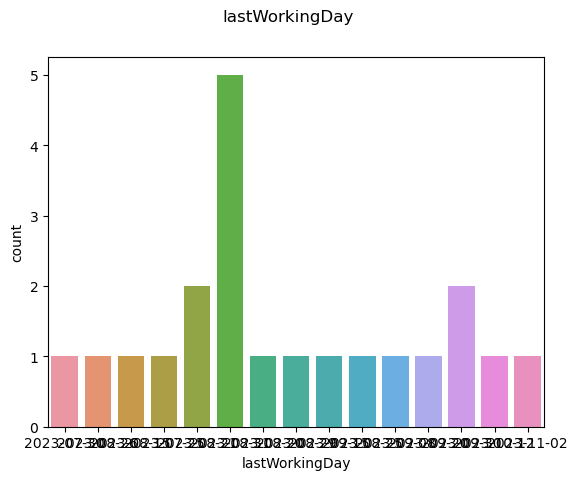

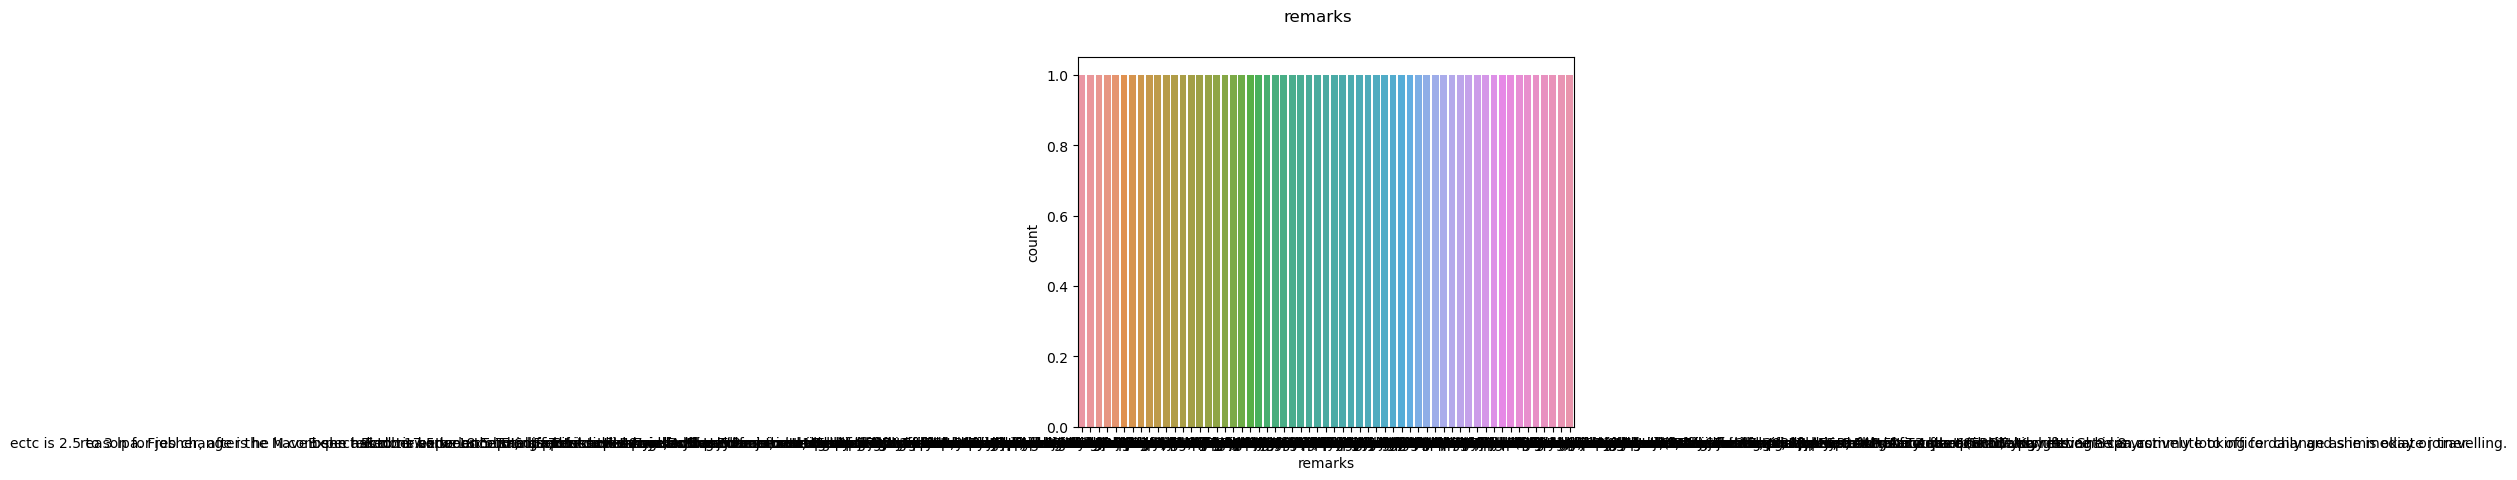

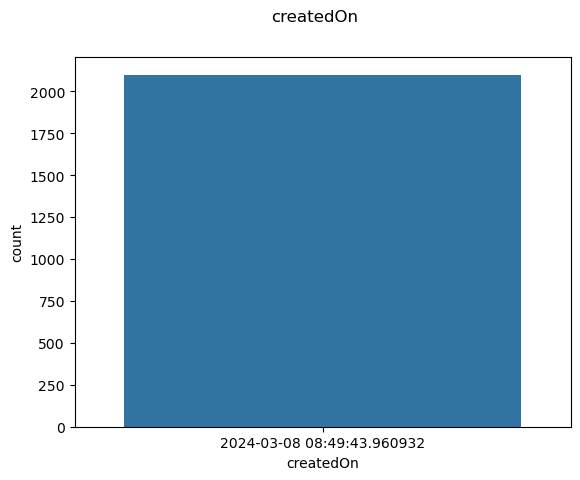

In [23]:
plt.figure(figsize=(20,10))
# plt.suptitle("Univariate Analysis of Categorical Features", fontsize = 20, fontweight='bold')

for i in range(0, len(categorical_employment)):
    plt.suptitle(categorical_employment[i])
    sns.countplot(x= df_employment[categorical_employment[i]])
    plt.show()

### Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [24]:
df_employment[numeric_employment].corr()

employmentId  industry  role  orgId  totalWorkExp  minExp  \
employmentId          1.000000  0.131662   NaN    NaN      0.066372     NaN   
industry              0.131662  1.000000   NaN    NaN      0.042232     NaN   
role                       NaN       NaN   NaN    NaN           NaN     NaN   
orgId                      NaN       NaN   NaN    NaN           NaN     NaN   
totalWorkExp          0.066372  0.042232   NaN    NaN      1.000000     NaN   
minExp                     NaN       NaN   NaN    NaN           NaN     NaN   
maxExp                     NaN       NaN   NaN    NaN           NaN     NaN   
packageOffered        0.461850  0.445564   NaN    NaN      0.155918     NaN   
previousCompany            NaN       NaN   NaN    NaN           NaN     NaN   
offerLetter                NaN       NaN   NaN    NaN           NaN     NaN   
experienceLetter           NaN       NaN   NaN    NaN           NaN     NaN   
relieveingLetter           NaN       NaN   NaN    NaN           NaN     NaN   
isRecent                   NaN       NaN   NaN    NaN           NaN     NaN   
paySlips                   NaN       NaN   NaN    NaN           NaN     NaN   

                  maxExp  packageOffered  previousCompany  offerLetter  \
employmentId         NaN        0.461850              NaN          NaN   
industry             NaN        0.445564              NaN          NaN   
role                 NaN             NaN              NaN          NaN   
orgId                NaN             NaN              NaN          NaN   
totalWorkExp         NaN        0.155918              NaN          NaN   
minExp               NaN             NaN              NaN          NaN   
maxExp               NaN             NaN              NaN          NaN   
packageOffered       NaN        1.000000              NaN          NaN   
previousCompany      NaN             NaN              NaN          NaN   
offerLetter          NaN             NaN              NaN          NaN   
experienceLetter     NaN             NaN              NaN          NaN   
relieveingLetter     NaN             NaN              NaN          NaN   
isRecent             NaN             NaN              NaN          NaN   
paySlips             NaN             NaN              NaN          NaN   

                  experienceLetter  relieveingLetter  isRecent  paySlips  
employmentId                   NaN               NaN       NaN       NaN  
industry                       NaN               NaN       NaN       NaN  
role                           NaN               NaN       NaN       NaN  
orgId                          NaN               NaN       NaN       NaN  
totalWorkExp                   NaN               NaN       NaN       NaN  
minExp                         NaN               NaN       NaN       NaN  
maxExp                         NaN               NaN       NaN       NaN  
packageOffered                 NaN               NaN       NaN       NaN  
previousCompany                NaN               NaN       NaN       NaN  
offerLetter                    NaN               NaN       NaN       NaN  
experienceLetter               NaN               NaN       NaN       NaN  
relieveingLetter               NaN               NaN       NaN       NaN  
isRecent                       NaN               NaN       NaN       NaN  
paySlips                       NaN               NaN       NaN       NaN

<Axes: >

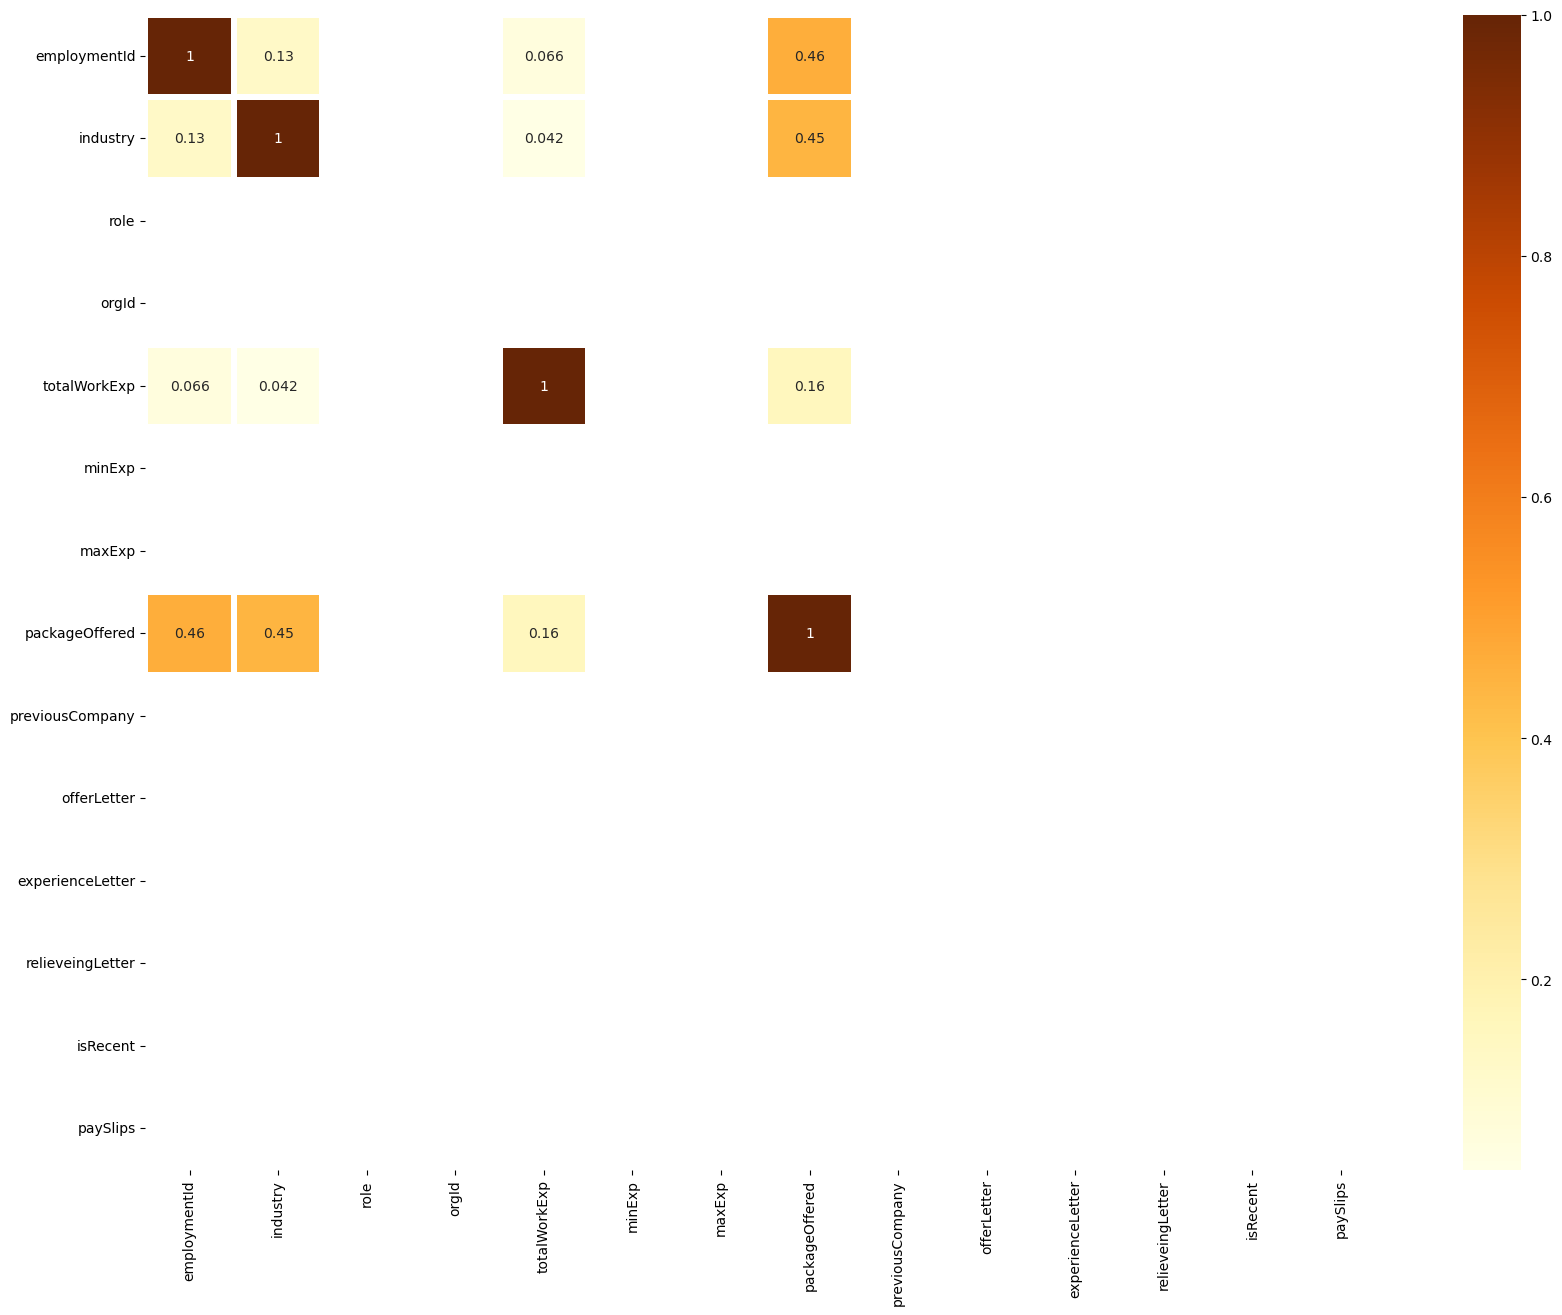

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df_employment[numeric_employment].corr(), annot=True, cmap = 'YlOrBr', linewidths=3)

---------------------

## Data Preproccessing for df_job

-----------------------

In [26]:
df_job.head()

jobTitle                    position  minBudget  \
0  Plant Maintenance Engineer  Plant Maintenance Engineer   300000.0   
1   Adobe Analytics developer     AdobeAnalyticsdeveloper       14.0   
2               AEM architect                Aemarchitect       12.0   
3        Azure Administrator         Azure Administrator        14.0   
4               AEM architect                Aemarchitect       30.0   

   maxBudget  travelReq                     location  \
0   600000.0       True                  {Hyderabad}   
1       15.0       True  {ChennaiBangaloreHyderabad}   
2       15.0       True                  {bangalore}   
3       16.0      False                {"Pan India"}   
4       32.0       True                  {bangalore}   

                                         description  \
0  Read and understand the data from P&ID, PEFS, ...   
1  An understanding of the marketing technologies...   
2  To analyze, understand the client’s business u...   
3  1.\tArchitecture and Design for large scale Az...   
4  Should have experience in java, OSGI, Componen...   

                                          attachment  orgId    jobType  \
0                                                NaN      1  Permanent   
1                                                NaN      1  Permanent   
2                                                NaN      1  Permanent   
3                                                NaN      1  Permanent   
4  https://storage.googleapis.com/hrm-musquare/jo...      1  Permanent   

                                              skills           recruiter  \
0                              {"Plant Maintenance"}            DB413862   
1  {"Adobe anaytics",Agile,tableau,Marketo,"power...  Venkata Sai Rohith   
2                              {JIRA,Confluence,AEM}  Venkata Sai Rohith   
3                           {"Azure Administrator "}            PC138515   
4                  {sling,jackrabbit,OSGI,felix,JCR}  Venkata Sai Rohith   

     client  minExp  maxExp noticePeriod  status     jobId  \
0  CIHI7757    2.00     5.0   15-30 days  Active  JDA&5399   
1  CIHW9344    3.00     4.0   15-30 days  Active  JDAA1476   
2  CIHW9344    4.00     6.0   30-45 days  Active  JDAA5139   
3  CIQC2196    6.00     8.0   45-60 days  Active  JDAA6310   
4  CIHW9344    9.96    15.0   30-45 days  Active  JDAA7883   

                   createDate  vacancies priority priceType          workType  \
0   2023-01-31 11:09:26.36189        2.0     High       INR  Work from Office   
1  2022-03-30 11:20:03.031659        1.0     High       NaN               NaN   
2  2022-03-07 13:21:41.393509        NaN      Low       NaN               NaN   
3   2023-05-04 12:23:28.16582        1.0     High       INR  Work from Office   
4  2022-03-07 13:35:36.779486        NaN      NaN       NaN               NaN   

  comment  subvendorId  Questionnaires country  department  eligibility  \
0     NaN          NaN             NaN     NaN         NaN          NaN   
1     NaN          NaN             NaN     NaN         NaN          NaN   
2     NaN          NaN             NaN     NaN         NaN          NaN   
3     NaN          NaN             NaN     NaN         NaN          NaN   
4     NaN          NaN             NaN     NaN         NaN          NaN   

   responsibilities  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [27]:
df_job.shape

(307, 30)

In [28]:
df_job.describe().T

count           mean           std  min   25%       50%  \
minBudget         306.0  458915.990196  1.532037e+06  0.0   6.0      24.5   
maxBudget         306.0  874875.774510  2.216359e+06  2.0  15.0  275001.0   
orgId             307.0       1.000000  0.000000e+00  1.0   1.0       1.0   
minExp            307.0       4.339707  6.940431e+00  0.0   2.0       4.0   
maxExp            307.0       7.091466  9.066452e+00  0.0   5.0       6.0   
vacancies         270.0       2.266667  3.757916e+00 -1.0   1.0       1.0   
subvendorId         0.0            NaN           NaN  NaN   NaN       NaN   
Questionnaires      0.0            NaN           NaN  NaN   NaN       NaN   
department          0.0            NaN           NaN  NaN   NaN       NaN   
eligibility         0.0            NaN           NaN  NaN   NaN       NaN   
responsibilities    0.0            NaN           NaN  NaN   NaN       NaN   

                        75%         max  
minBudget          600000.0  25000000.0  
maxBudget         1200000.0  30000000.0  
orgId                   1.0         1.0  
minExp                  5.0       108.0  
maxExp                  8.0       144.0  
vacancies               2.0        50.0  
subvendorId             NaN         NaN  
Questionnaires          NaN         NaN  
department              NaN         NaN  
eligibility             NaN         NaN  
responsibilities        NaN         NaN

In [29]:
df_job.dtypes

jobTitle             object
position             object
minBudget           float64
maxBudget           float64
travelReq              bool
location             object
description          object
attachment           object
orgId                 int64
jobType              object
skills               object
recruiter            object
client               object
minExp              float64
maxExp              float64
noticePeriod         object
status               object
jobId                object
createDate           object
vacancies           float64
priority             object
priceType            object
workType             object
comment              object
subvendorId         float64
Questionnaires      float64
country              object
department          float64
eligibility         float64
responsibilities    float64
dtype: object

## EXPLORING DATA

**Most of the features seems to be of object data type, Now let's seperate Categorical and numerical columns**

In [30]:
numerical_job = [feature for feature in df_job.columns if df_job[feature].dtype != "O"]
categorical_job = [feature for feature in df_job.columns if df_job[feature].dtype == "O"]

# print columns
print('We have {} numerical features : {}'.format(len(numerical_job), numerical_job))
print('\nWe have {} categorical features : {}'.format(len(categorical_job), categorical_job))

We have 12 numerical features : ['minBudget', 'maxBudget', 'travelReq', 'orgId', 'minExp', 'maxExp', 'vacancies', 'subvendorId', 'Questionnaires', 'department', 'eligibility', 'responsibilities']

We have 18 categorical features : ['jobTitle', 'position', 'location', 'description', 'attachment', 'jobType', 'skills', 'recruiter', 'client', 'noticePeriod', 'status', 'jobId', 'createDate', 'priority', 'priceType', 'workType', 'comment', 'country']


### Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Numerical Features

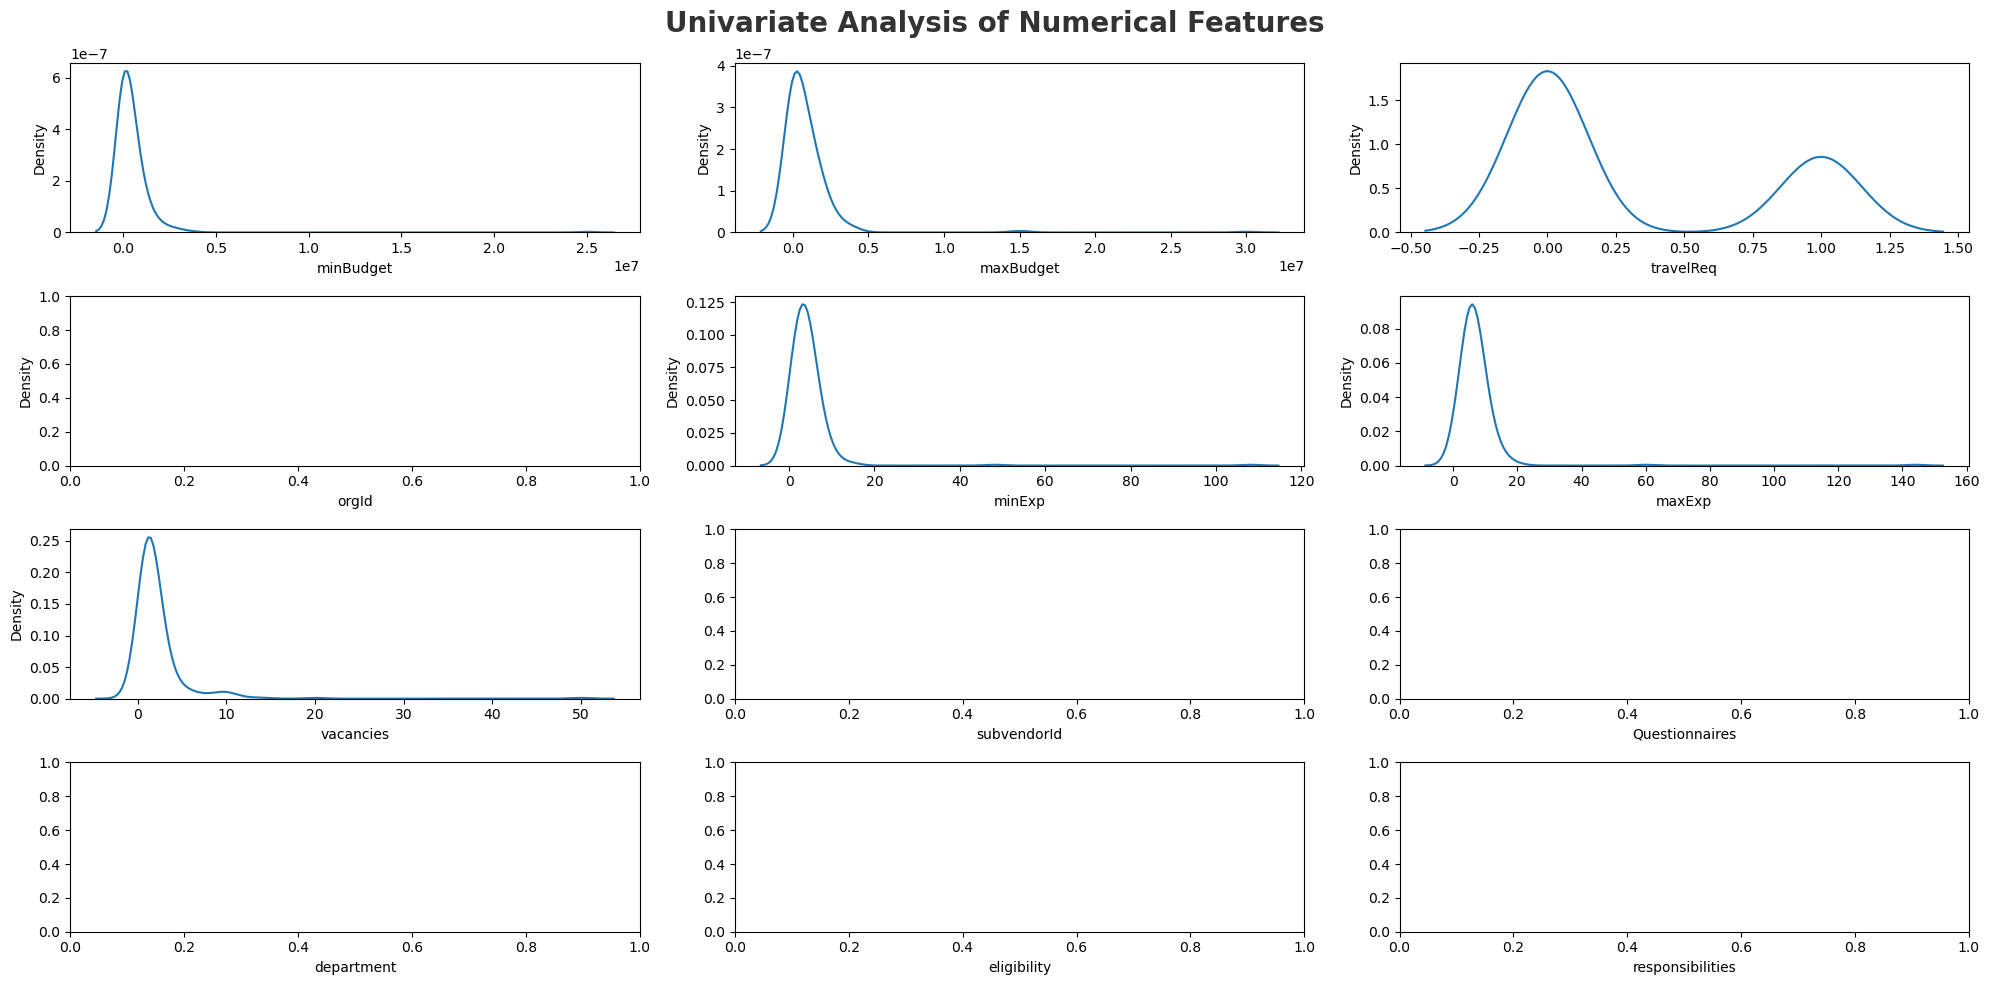

In [31]:
plt.figure(figsize =(20,10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize = 20, fontweight = 'bold', alpha = 0.8 )

for i in range(0,len(numerical_job)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x = df_job[numerical_job[i]])
    plt.xlabel(numerical_job[i])
    plt.tight_layout()

In [32]:
cat_columns = []

for i in categorical_job:
    print(f'{i}: {len(df_job[i].unique())}')
    if len(df_job[i].unique()) < 15:
        cat_columns.append(i)

jobTitle: 277
position: 234
location: 53
description: 300
attachment: 69
jobType: 3
skills: 295
recruiter: 15
client: 23
noticePeriod: 5
status: 4
jobId: 307
createDate: 276
priority: 6
priceType: 3
workType: 4
comment: 6
country: 2


In [33]:
cat_columns

['jobType',
 'noticePeriod',
 'status',
 'priority',
 'priceType',
 'workType',
 'comment',
 'country']

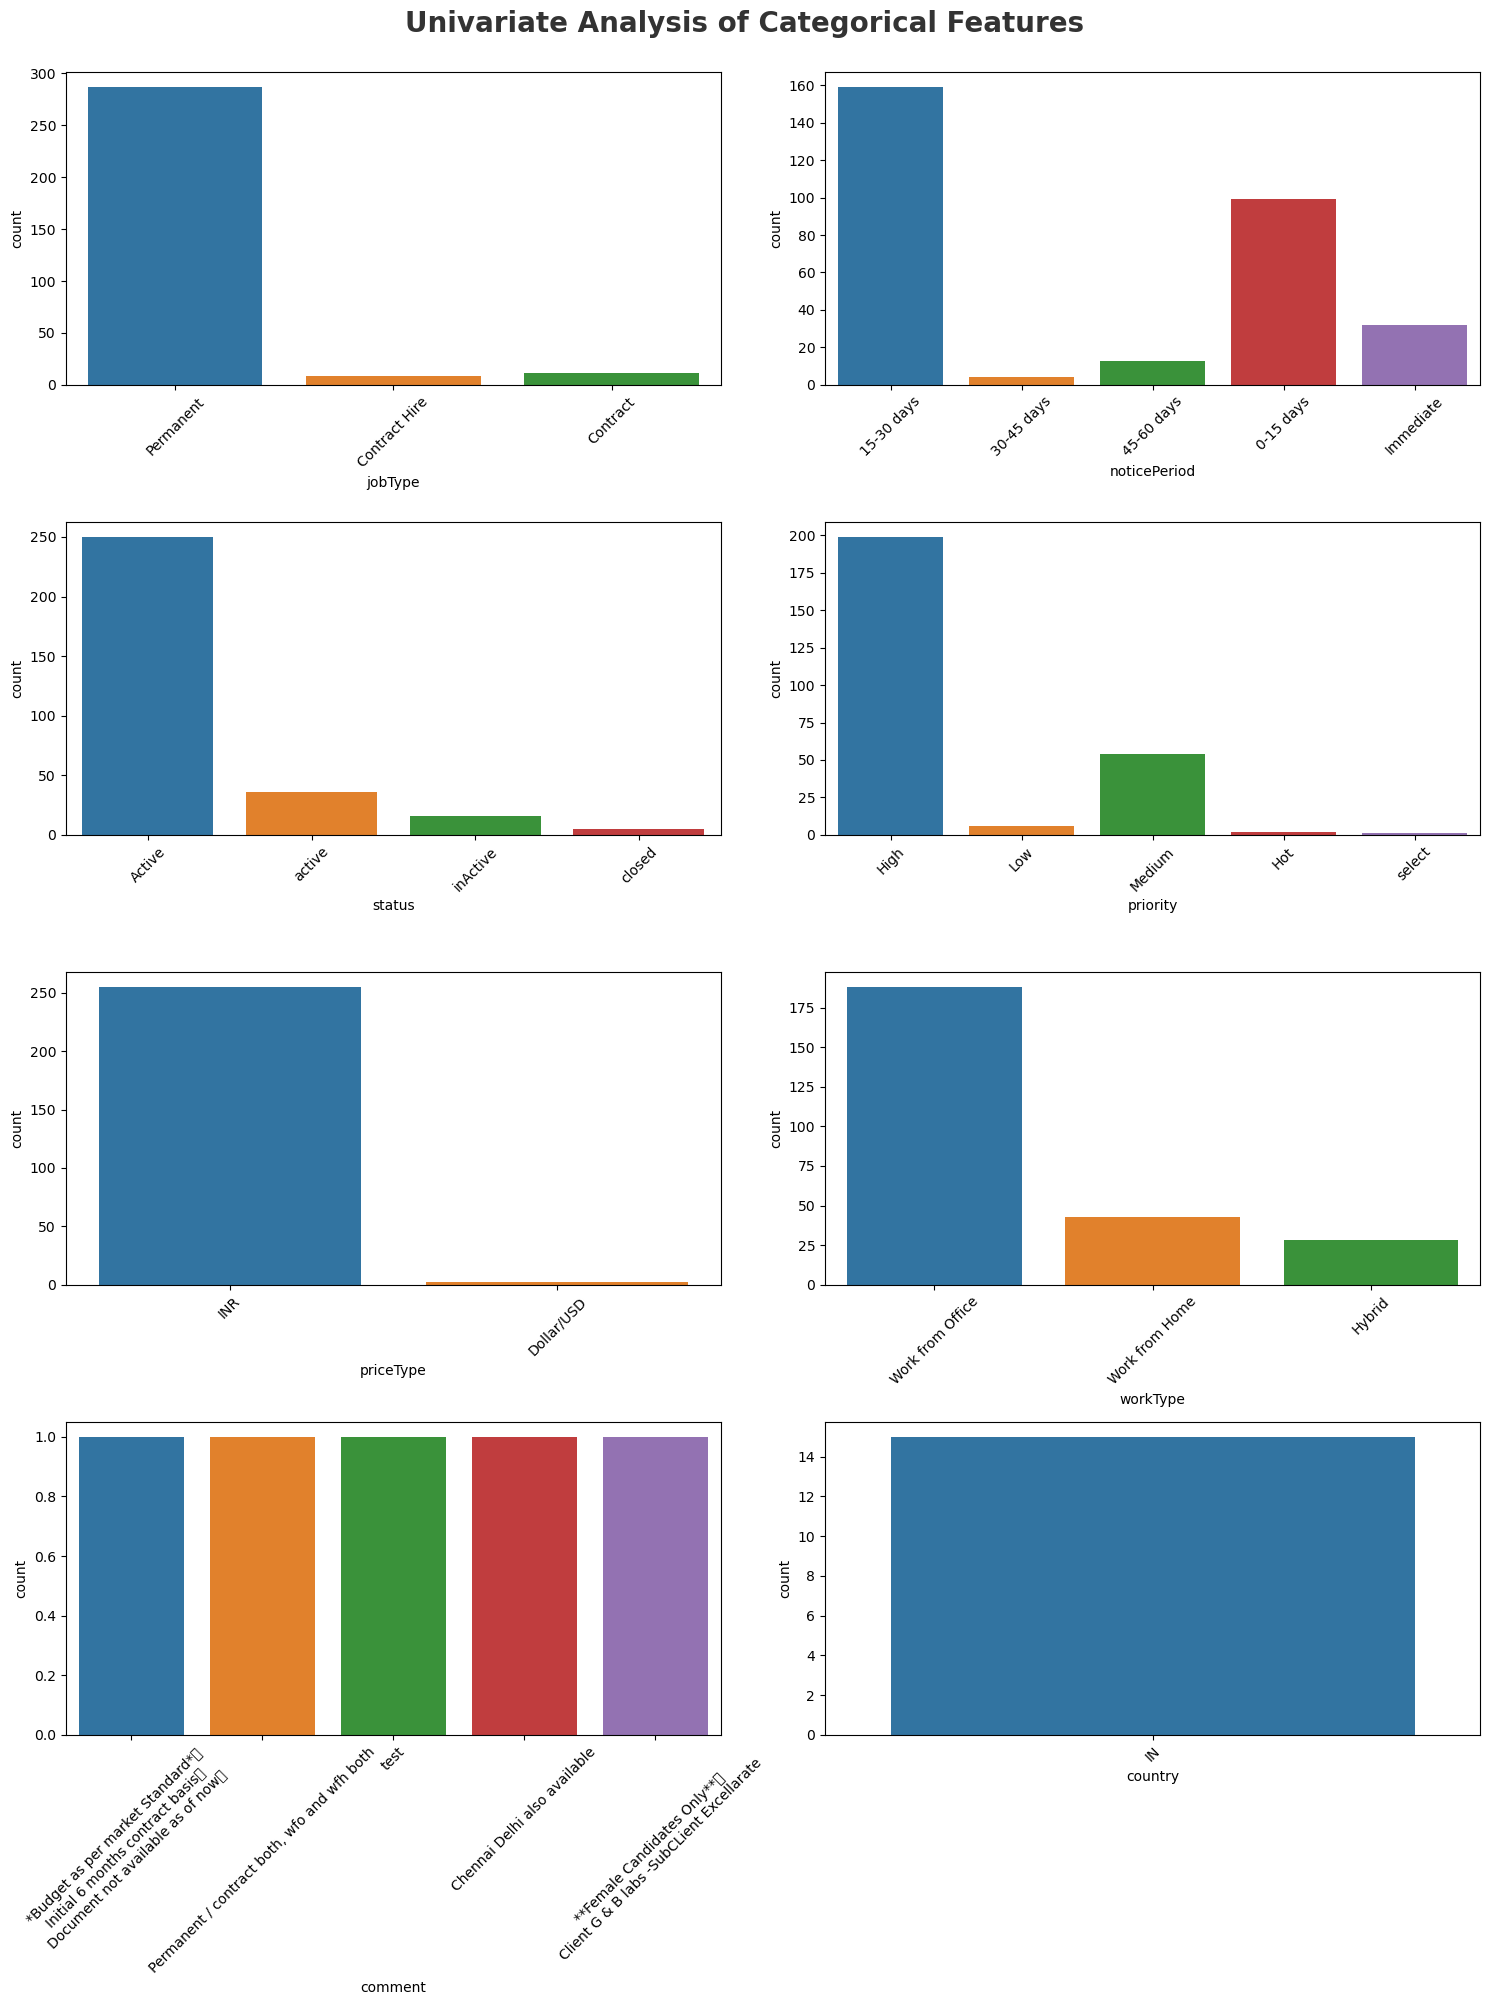

In [41]:
# categorical columns
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_columns)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_job[cat_columns[i]])
    plt.xlabel(cat_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.savefig("Univariate Analysis of Categorical job")

In [35]:
df_job.isnull().sum()

jobTitle              0
position              0
minBudget             1
maxBudget             1
travelReq             0
location              0
description           0
attachment          239
orgId                 0
jobType               0
skills                0
recruiter             0
client                0
minExp                0
maxExp                0
noticePeriod          0
status                0
jobId                 0
createDate            0
vacancies            37
priority             45
priceType            50
workType             48
comment             302
subvendorId         307
Questionnaires      307
country             292
department          307
eligibility         307
responsibilities    307
dtype: int64

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

## Correlation between Numerical Columns

In [36]:
df_job[numerical_job].corr()

minBudget  maxBudget  travelReq  orgId    minExp    maxExp  \
minBudget          1.000000   0.842138   0.092756    NaN  0.038783  0.037647   
maxBudget          0.842138   1.000000   0.046936    NaN  0.021110  0.024244   
travelReq          0.092756   0.046936   1.000000    NaN -0.003279 -0.010038   
orgId                   NaN        NaN        NaN    NaN       NaN       NaN   
minExp             0.038783   0.021110  -0.003279    NaN  1.000000  0.981481   
maxExp             0.037647   0.024244  -0.010038    NaN  0.981481  1.000000   
vacancies         -0.007996  -0.034278   0.102757    NaN -0.042601 -0.051497   
subvendorId             NaN        NaN        NaN    NaN       NaN       NaN   
Questionnaires          NaN        NaN        NaN    NaN       NaN       NaN   
department              NaN        NaN        NaN    NaN       NaN       NaN   
eligibility             NaN        NaN        NaN    NaN       NaN       NaN   
responsibilities        NaN        NaN        NaN    NaN       NaN       NaN   

                  vacancies  subvendorId  Questionnaires  department  \
minBudget         -0.007996          NaN             NaN         NaN   
maxBudget         -0.034278          NaN             NaN         NaN   
travelReq          0.102757          NaN             NaN         NaN   
orgId                   NaN          NaN             NaN         NaN   
minExp            -0.042601          NaN             NaN         NaN   
maxExp            -0.051497          NaN             NaN         NaN   
vacancies          1.000000          NaN             NaN         NaN   
subvendorId             NaN          NaN             NaN         NaN   
Questionnaires          NaN          NaN             NaN         NaN   
department              NaN          NaN             NaN         NaN   
eligibility             NaN          NaN             NaN         NaN   
responsibilities        NaN          NaN             NaN         NaN   

                  eligibility  responsibilities  
minBudget                 NaN               NaN  
maxBudget                 NaN               NaN  
travelReq                 NaN               NaN  
orgId                     NaN               NaN  
minExp                    NaN               NaN  
maxExp                    NaN               NaN  
vacancies                 NaN               NaN  
subvendorId               NaN               NaN  
Questionnaires            NaN               NaN  
department                NaN               NaN  
eligibility               NaN               NaN  
responsibilities          NaN               NaN

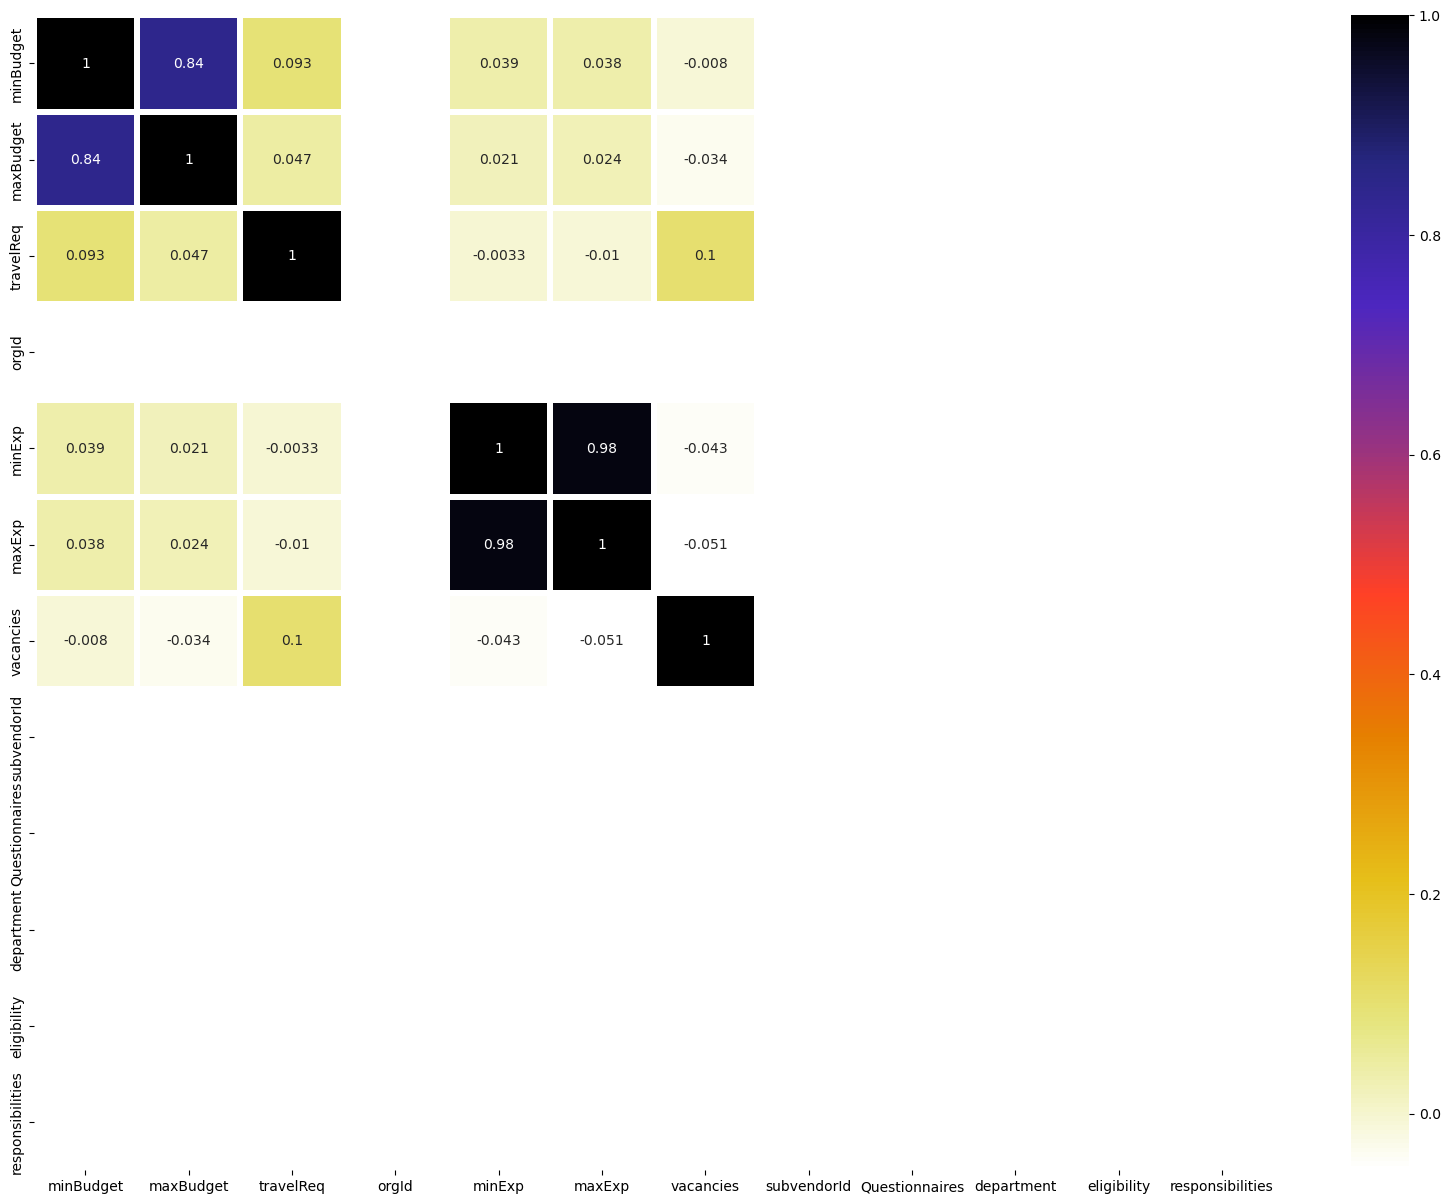

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df_job[numerical_job].corr(),annot=True, linewidths=3, cmap='CMRmap_r')
plt.show()

#### Insights

* There is high correlation between MaxBudget and MinBudget
* There is high correlation between MaxExp and MinExp

---------------------------------------
--------------------------------------
## <span style="color:yellow">FINAL REPORT</span>

----------------------------------
----------------------------------

* For content based recommendation system we need few of our columns.
* Most important columns for us are; <span style="color:red">job description, job title, education level, currentDesignation, currentCompany, and position </span>.
* Most jobs are searched for Permenant Position.
* work from office is posted more by employers.
* There are correlation seen in dataframes, if we need to do further evaluation and model training we need to consider those correlations as well, but for now we do not need them.